In [3]:
import numpy as np
import seaborn as sns
from seaborn import lmplot, boxplot
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import warnings

df = pd.read_csv('diamonds.csv', sep=',', encoding='utf-8')

# Eliminar la columna 'Unnamed: 0' si existe
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# ANÁLISIS EXPLORATORIO

In [187]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [188]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


El análisis descriptivo de los datos numéricos revela varias ideas clave sobre las características de los diamantes:

Carat (Peso): Los diamantes en el conjunto de datos varían en peso desde 0.2 hasta 5.01 quilates, con un peso promedio de 0.798 quilates. La desviación estándar de 0.474 indica una dispersión considerable en los pesos de los diamantes.

Depth (Profundidad): La profundidad porcentual total de los diamantes oscila entre el 43% y el 79%, con un promedio del 61.75%. La desviación estándar de 1.43 sugiere una variación moderada en la profundidad.

Table (Ancho de la Tabla): El ancho de la tabla varía del 43% al 95%, con un promedio del 57.46%. La desviación estándar de 2.23 indica una amplia gama de anchos de tabla en los diamantes.


Price (Precio): Los precios de los diamantes van desde $326 hasta $18,823, con un precio promedio de $3,932.80. La desviación estándar de $3,989.44 revela una gran dispersión en los precios, lo que sugiere una amplia variedad de calidades y características en los diamantes.

Dimensiones (x, y, z): Las dimensiones de los diamantes (largo, ancho y profundidad) también muestran una variación considerable. Es interesante notar que la dimensión 'y' (ancho) tiene un valor máximo atípico de 58.9 mm, lo que podría indicar un error de datos o un diamante con una forma inusual.

In [226]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

Variables Numéricas: Las columnas carat, depth, table, price, x, y, y z son numéricas (float64 para valores decimales e int64 para valores enteros). Estas variables se pueden utilizar directamente para cálculos y análisis estadísticos.
Variables Categóricas: Las columnas cut, color, y clarity son de tipo objeto, lo que sugiere que contienen valores categóricos o de texto. Estas variables requerirán codificación o transformación antes de poder ser utilizadas en modelos de aprendizaje automático.

In [202]:
#df.info()
# Verificar si hay valores nulos en el DataFrame
missing_values = df.isnull().sum()
print(f"Valores nulos en el DataFramen:\n{missing_values}")

Valores nulos en el DataFramen:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [203]:
# Get the column names that are of type 'Object'
categorical_columns = df.select_dtypes(include='object').columns

# Iterate over each categorical column
for col in categorical_columns:
    # Calculate and print the value counts
    print(f"\nValue counts for '{col}':\n", tabulate(df[col].value_counts().reset_index(), headers='keys', tablefmt='pipe', showindex=False))


Value counts for 'cut':
 | cut       |   count |
|:----------|--------:|
| Ideal     |   21551 |
| Premium   |   13791 |
| Very Good |   12082 |
| Good      |    4906 |
| Fair      |    1610 |

Value counts for 'color':
 | color   |   count |
|:--------|--------:|
| G       |   11292 |
| E       |    9797 |
| F       |    9542 |
| H       |    8304 |
| D       |    6775 |
| I       |    5422 |
| J       |    2808 |

Value counts for 'clarity':
 | clarity   |   count |
|:----------|--------:|
| SI1       |   13065 |
| VS2       |   12258 |
| SI2       |    9194 |
| VS1       |    8171 |
| VVS2      |    5066 |
| VVS1      |    3655 |
| IF        |    1790 |
| I1        |     741 |


In [204]:
# Calculate the percentage of missing values in each column, avoiding division by zero
missing_percentage = df.isnull().sum() / (len(df) + 1e-8)

# Filter columns with missing values and sort them in ascending order
missing_percentage = missing_percentage[missing_percentage > 0].sort_values()

# Display the columns with missing values and their percentage
print("Porcentaje de valores faltantes por columna:")
print(missing_percentage.to_markdown(numalign="left", stralign="left"))

Porcentaje de valores faltantes por columna:
| 0   |
|-----|


In [205]:
numeric_data = df.select_dtypes(include=[np.number])
cat_data = df.select_dtypes(exclude=[np.number])
print ("Hay {} columnas numéricas y {} columnas categóricas en los datos de entrenamiento".format(numeric_data.shape[1],cat_data.shape[1]))

Hay 7 columnas numéricas y 3 columnas categóricas en los datos de entrenamiento


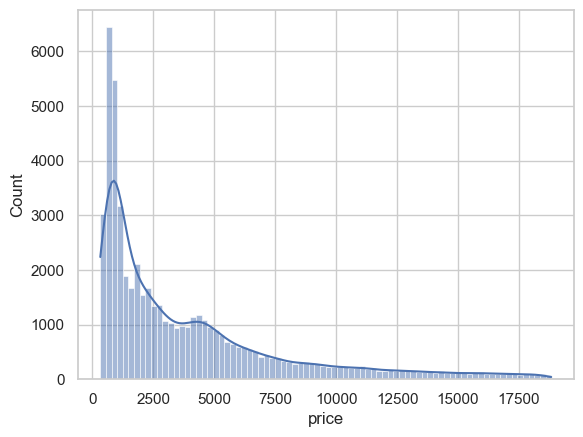

In [206]:
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.")
try:
    sns.histplot(df['price'], kde=True)
except Exception as e:
    print("Error:", e)

Skewness is 0.11529585821715065


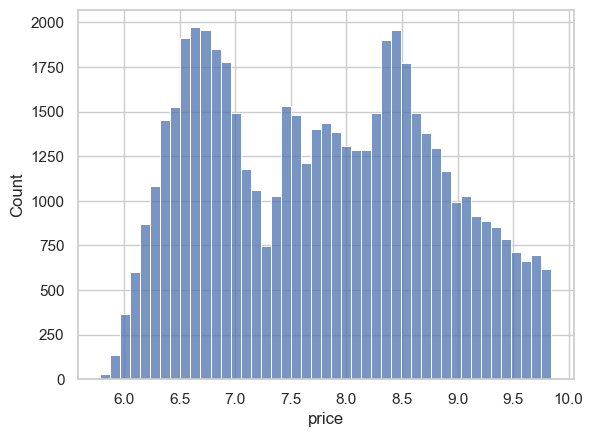

In [207]:
# Reemplazar con NaN
try:
    target = np.log(df['price'])
    print ('Skewness is', target.skew())
    sns.histplot(target)

except Exception as e:
    print("Error:", e)

Correlation:
|       |   carat |   depth |   table |   price |      x |      y |     z |
|:------|--------:|--------:|--------:|--------:|-------:|-------:|------:|
| carat |   1     |   0.028 |   0.182 |   0.922 |  0.975 |  0.952 | 0.953 |
| depth |   0.028 |   1     |  -0.296 |  -0.011 | -0.025 | -0.029 | 0.095 |
| table |   0.182 |  -0.296 |   1     |   0.127 |  0.195 |  0.184 | 0.151 |
| price |   0.922 |  -0.011 |   0.127 |   1     |  0.884 |  0.865 | 0.861 |
| x     |   0.975 |  -0.025 |   0.195 |   0.884 |  1     |  0.975 | 0.971 |
| y     |   0.952 |  -0.029 |   0.184 |   0.865 |  0.975 |  1     | 0.952 |
| z     |   0.953 |   0.095 |   0.151 |   0.861 |  0.971 |  0.952 | 1     |


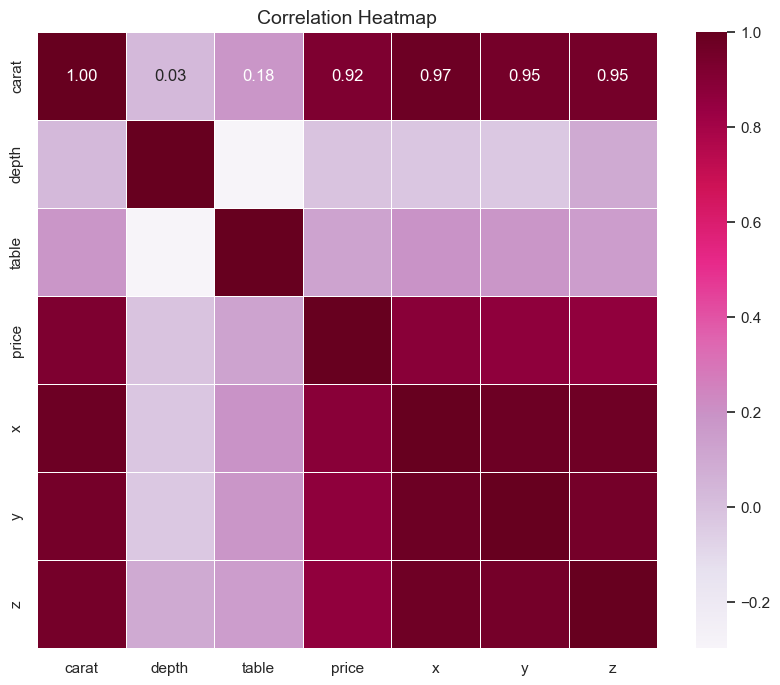

In [208]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True).round(3)

# Print the correlation matrix
print("Correlation:")
print(tabulate(correlation_matrix, headers='keys', tablefmt='pipe', showindex=True))

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="PuRd", fmt=".2f", linewidths=.5)

# Add title
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

|       |   carat |   depth |   table |   price |      x |      y |     z |
|:------|--------:|--------:|--------:|--------:|-------:|-------:|------:|
| carat |   1     |   0.028 |   0.182 |   0.922 |  0.975 |  0.952 | 0.953 |
| depth |   0.028 |   1     |  -0.296 |  -0.011 | -0.025 | -0.029 | 0.095 |
| table |   0.182 |  -0.296 |   1     |   0.127 |  0.195 |  0.184 | 0.151 |
| price |   0.922 |  -0.011 |   0.127 |   1     |  0.884 |  0.865 | 0.861 |
| x     |   0.975 |  -0.025 |   0.195 |   0.884 |  1     |  0.975 | 0.971 |
| y     |   0.952 |  -0.029 |   0.184 |   0.865 |  0.975 |  1     | 0.952 |
| z     |   0.953 |   0.095 |   0.151 |   0.861 |  0.971 |  0.952 | 1     |


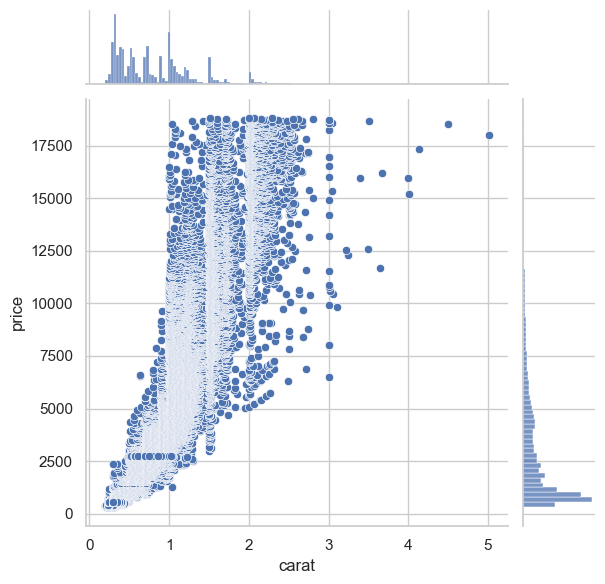

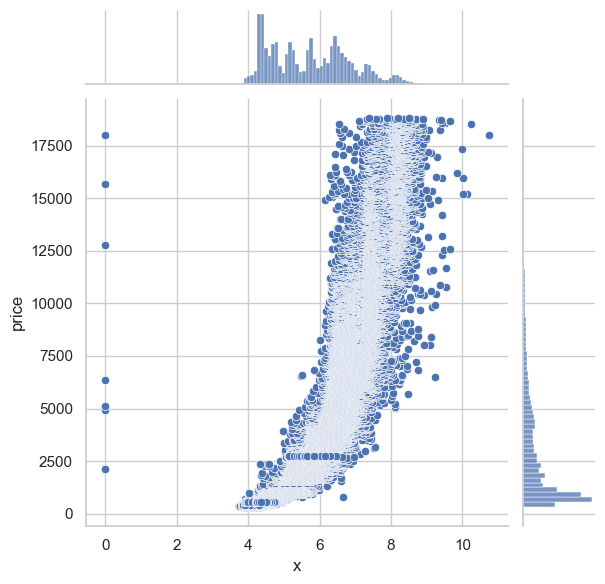

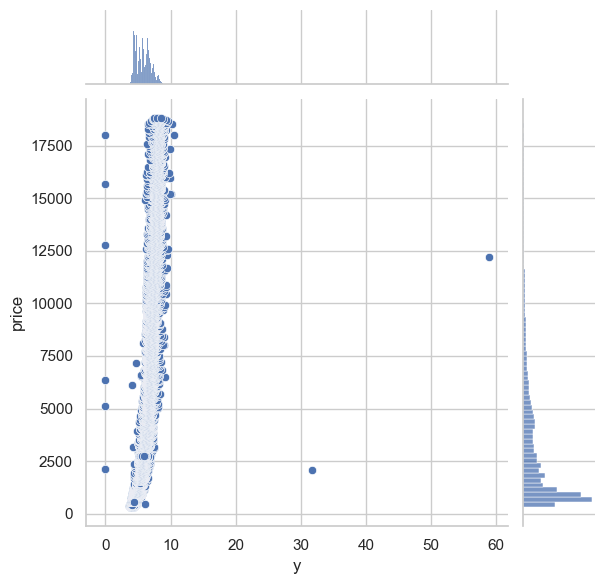

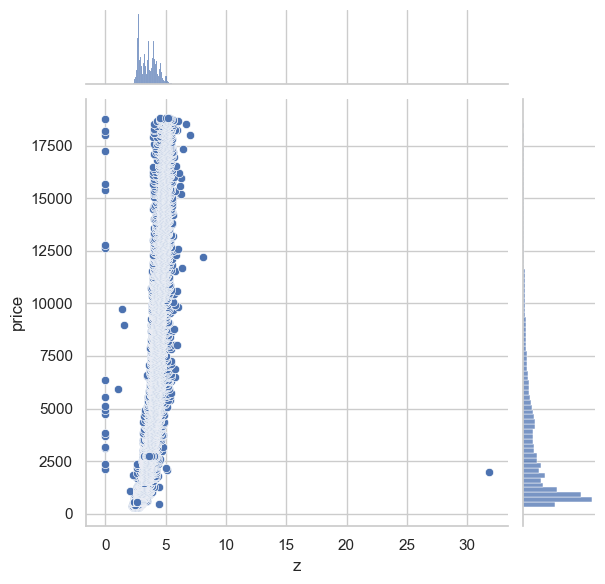

In [209]:
# Calcular la matriz de correlación
correlation_matrix = df.corr(numeric_only=True).round(3)
print(tabulate(correlation_matrix, headers='keys', tablefmt='pipe', showindex=True))

sns.jointplot(x=df['carat'], y=df['price'] )
sns.jointplot(x=df['x'], y=df['price'] )
sns.jointplot(x=df['y'], y=df['price'] )
sns.jointplot(x=df['z'], y=df['price'] )

|       |   carat |   depth |   table |   price |      x |      y |     z |
|:------|--------:|--------:|--------:|--------:|-------:|-------:|------:|
| carat |   1     |   0.028 |   0.182 |   0.922 |  0.975 |  0.952 | 0.953 |
| depth |   0.028 |   1     |  -0.296 |  -0.011 | -0.025 | -0.029 | 0.095 |
| table |   0.182 |  -0.296 |   1     |   0.127 |  0.195 |  0.184 | 0.151 |
| price |   0.922 |  -0.011 |   0.127 |   1     |  0.884 |  0.865 | 0.861 |
| x     |   0.975 |  -0.025 |   0.195 |   0.884 |  1     |  0.975 | 0.971 |
| y     |   0.952 |  -0.029 |   0.184 |   0.865 |  0.975 |  1     | 0.952 |
| z     |   0.953 |   0.095 |   0.151 |   0.861 |  0.971 |  0.952 | 1     |


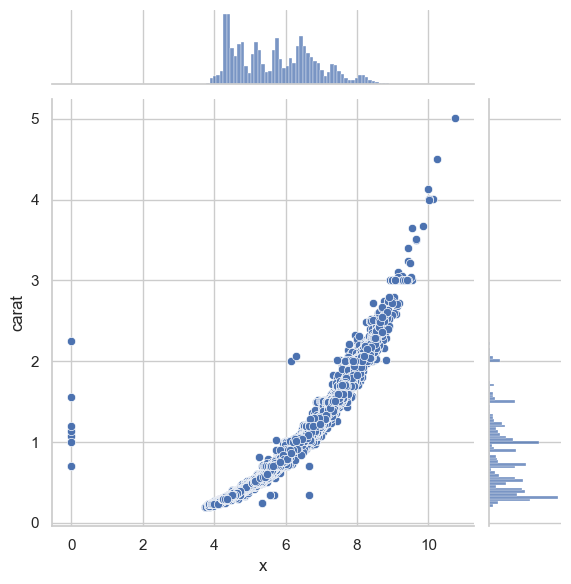

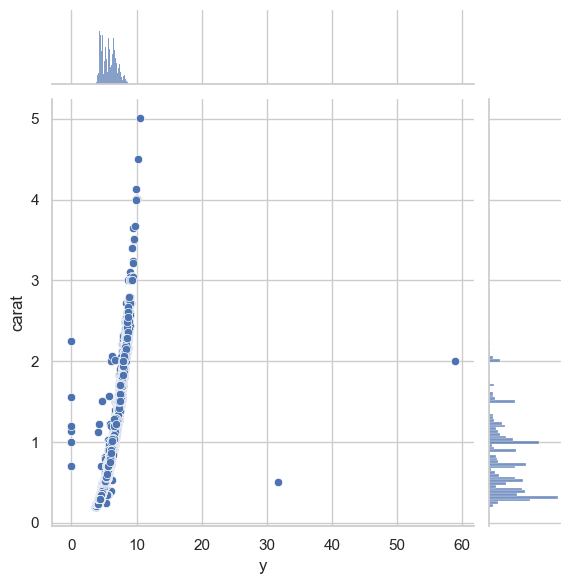

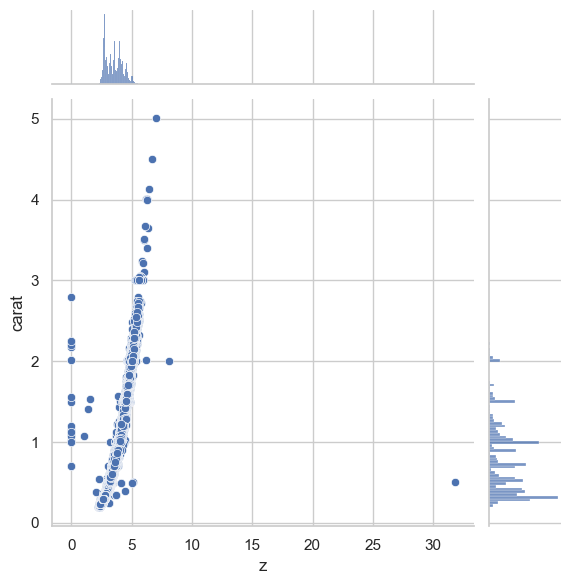

In [210]:
# Calcular la matriz de correlación
correlation_matrix = df.corr(numeric_only=True).round(3)
print(tabulate(correlation_matrix, headers='keys', tablefmt='pipe', showindex=True))

sns.jointplot(x=df['x'], y=df['carat'] )
sns.jointplot(x=df['y'], y=df['carat'] )
sns.jointplot(x=df['z'], y=df['carat'] )

In [211]:
cat_data.describe()

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [189]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


| Variable   |   Media |   Mediana |   Moda |
|:-----------|--------:|----------:|-------:|
| carat      |   0.798 |      0.7  |   0.3  |
| depth      |  61.749 |     61.8  |  62    |
| table      |  57.457 |     57    |  56    |
| x          |   5.731 |      5.7  |   4.37 |
| y          |   5.735 |      5.71 |   4.34 |
| z          |   3.539 |      3.53 |   2.7  |


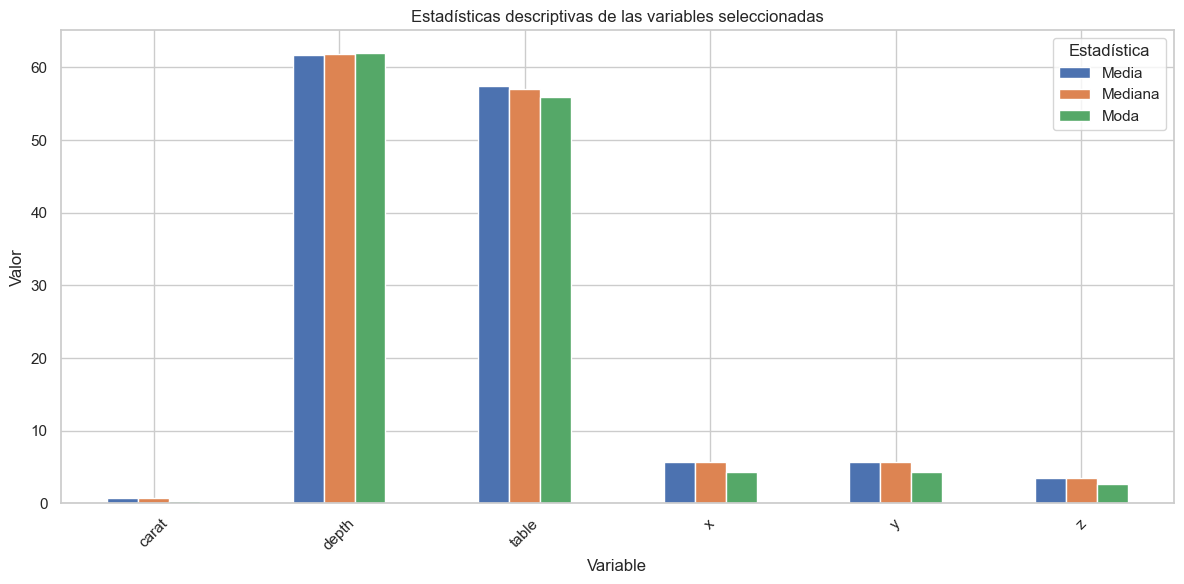

In [221]:
# Seleccionar sólo las columnas numéricas, excluyendo 'price'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns[numeric_columns != 'price']
filtered_df = df[numeric_columns]


mean = filtered_df.mean().reset_index().round(3)
median = filtered_df.median().reset_index()
mode = filtered_df.mode().iloc[0].reset_index()

# Renombrar columnas
mean = mean.rename(columns={'index':'Variable',0:'Valor'})
median = median.rename(columns={'index':'Variable',0:'Valor'})
mode = mode.rename(columns={'index':'Variable',0:'Valor'})

mean['Statistic'] = 'Media'
median['Statistic'] = 'Mediana'
mode['Statistic'] = 'Moda'

merged_df = pd.concat([mean, median, mode])

pivoted_df = merged_df.pivot(index='Variable', columns='Statistic', values='Valor').reset_index()

print(tabulate(pivoted_df, headers='keys', tablefmt='pipe', showindex=False))

# Graficar
fig, ax = plt.subplots(figsize=(12, 6))
pivoted_df.plot(kind='bar', ax=ax)
plt.xticks(range(len(pivoted_df)), pivoted_df['Variable'], rotation=45)
plt.ylabel('Valor')
plt.title('Estadísticas descriptivas de las variables seleccionadas')
plt.xlabel('Variable')
plt.legend(title='Estadística')
plt.tight_layout()
plt.show()

|            |   carat |   depth |   table |     x |     y |     z |
|:-----------|--------:|--------:|--------:|------:|------:|------:|
| Minimo     |    0.2  |    43   |      43 |  0    |  0    |  0    |
| Quartil 25 |    0.4  |    61   |      56 |  4.71 |  4.72 |  2.91 |
| Quartil 50 |    0.7  |    61.8 |      57 |  5.7  |  5.71 |  3.53 |
| Quartil 75 |    1.04 |    62.5 |      59 |  6.54 |  6.54 |  4.04 |
| Maximo     |    5.01 |    79   |      95 | 10.74 | 58.9  | 31.8  |


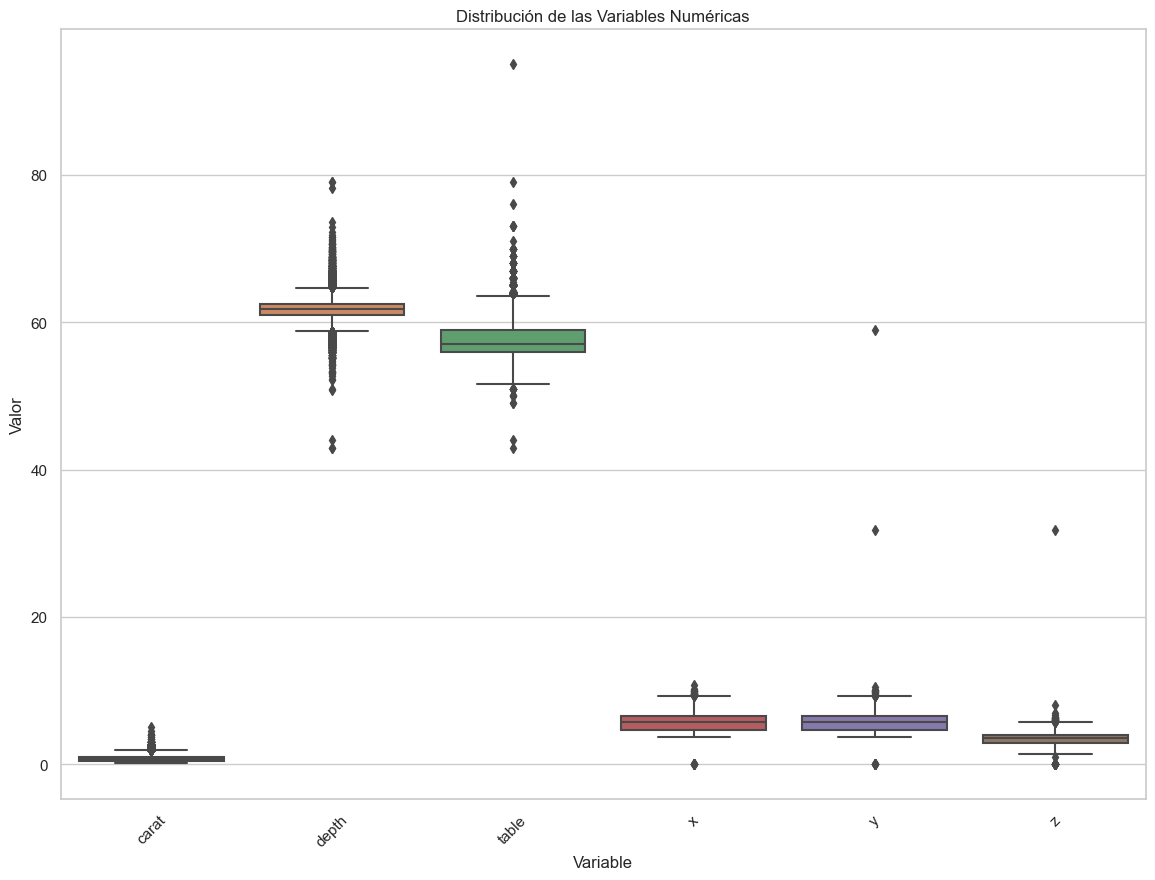

In [222]:
# Seleccionar sólo las columnas numéricas, excluyendo 'price'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns[numeric_columns != 'price']
filtered_df = df[numeric_columns]

# Calcular los estadísticos mínimos, cuartiles y máximos
stats_dict = {}
for col in numeric_columns:
    stats_dict[col] = [
        filtered_df[col].min(),
        filtered_df[col].quantile(0.25),
        filtered_df[col].median(),
        filtered_df[col].quantile(0.75),
        filtered_df[col].max()
    ]

# Crear un DataFrame con los estadísticos
stats_df = pd.DataFrame(stats_dict, index=['Minimo', 'Quartil 25', 'Quartil 50', 'Quartil 75', 'Maximo'])

# Imprimir el DataFrame en formato markdown
print(tabulate(stats_df, headers='keys', tablefmt='pipe', showindex=True))

# Graficar boxplots para visualizar la distribución de cada variable
plt.figure(figsize=(14, 10))
sns.boxplot(data=filtered_df)
plt.title('Distribución de las Variables Numéricas')
plt.xlabel('Variable')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

,price
cut,
Fair,3282.0
Good,3050.5
Ideal,1810.0
Premium,3185.0
Very Good,2648.0


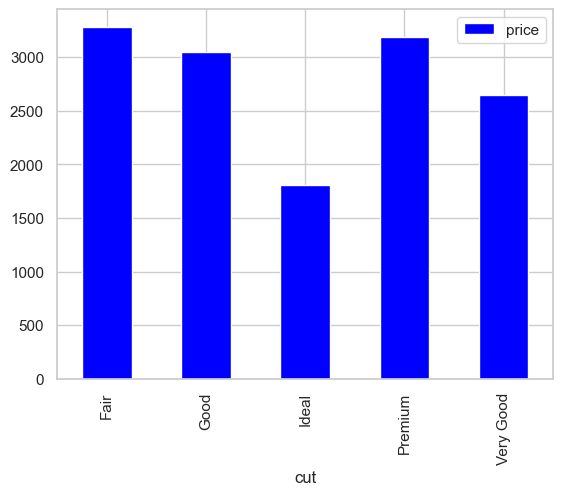

In [217]:
sp_pivot_cut = df.pivot_table(index='cut', values='price', aggfunc=np.median)
sp_pivot_cut.plot(kind='bar', color='blue')
sp_pivot_cut


<Axes: xlabel='cut', ylabel='price'>

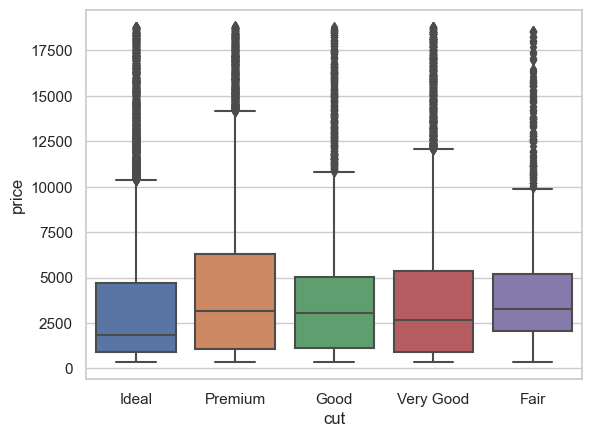

In [224]:
boxplot(x="cut", y="price", data=df)

,price
color,
D,1838.0
E,1739.0
F,2343.5
G,2242.0
H,3460.0
I,3730.0
J,4234.0


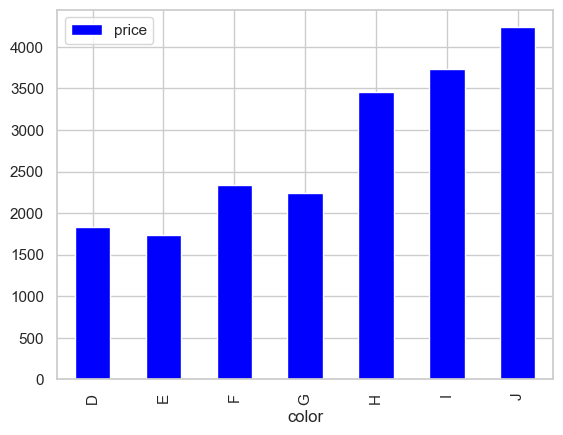

In [219]:
sp_pivot_color = df.pivot_table(index='color', values='price', aggfunc=np.median)
sp_pivot_color.plot(kind='bar', color='blue')
sp_pivot_color

<Axes: xlabel='color', ylabel='price'>

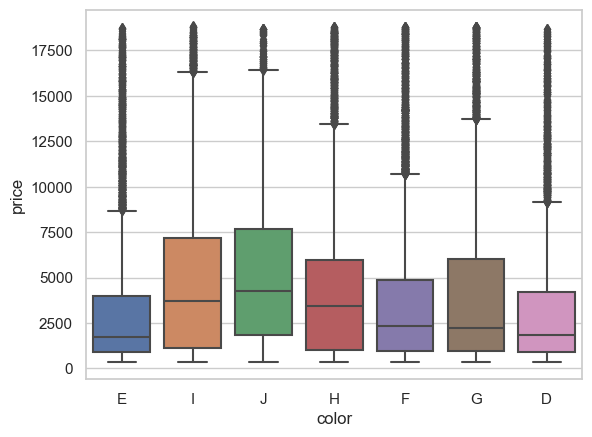

In [192]:
# Crear un gráfico de caja para cada variable cuantitativa
warnings.filterwarnings('ignore', category=FutureWarning)

boxplot(x="color", y="price",data=df)


,price
clarity,
I1,3344.0
IF,1080.0
SI1,2822.0
SI2,4072.0
VS1,2005.0
VS2,2054.0
VVS1,1093.0
VVS2,1311.0


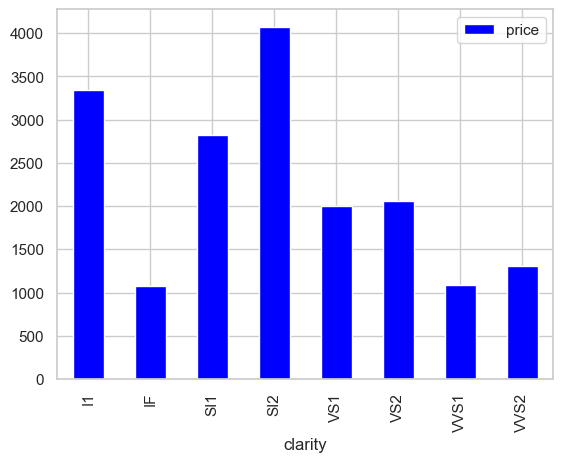

In [220]:
sp_pivot_clarity = df.pivot_table(index='clarity', values='price', aggfunc=np.median)
sp_pivot_clarity.plot(kind='bar', color='blue')
sp_pivot_clarity

<Axes: xlabel='clarity', ylabel='carat'>

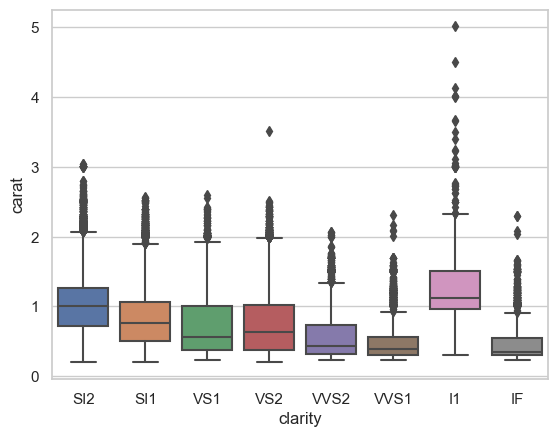

In [225]:
boxplot(x="clarity", y="carat", data=df)

In [215]:
# Create pivot tables for cut, color, and clarity
cut_pivot = df.pivot_table(index='cut', values='price', aggfunc=np.median)
cut_pivot.rename(columns={'price': 'cut_median_price'}, inplace=True)

color_pivot = df.pivot_table(index='color', values='price', aggfunc=np.median)
color_pivot.rename(columns={'price': 'color_median_price'}, inplace=True)

clarity_pivot = df.pivot_table(index='clarity', values='price', aggfunc=np.median)
clarity_pivot.rename(columns={'price': 'clarity_median_price'}, inplace=True)

# Combine the pivot tables horizontally
combined_pivot = pd.concat([cut_pivot, color_pivot, clarity_pivot], axis=1)

# Reset the index to make the categories a column
combined_pivot.reset_index(inplace=True)
combined_pivot.rename(columns={'index': 'Category'}, inplace=True)

# Replace all NaN values with '-' in the combined_pivot DataFrame
combined_pivot.fillna('-', inplace=True)

# Print the combined pivot table
print(combined_pivot.to_markdown(index=False, numalign="left", stralign="left"))

| Category   | cut_median_price   | color_median_price   | clarity_median_price   |
|:-----------|:-------------------|:---------------------|:-----------------------|
| Fair       | 3282.0             | -                    | -                      |
| Good       | 3050.5             | -                    | -                      |
| Ideal      | 1810.0             | -                    | -                      |
| Premium    | 3185.0             | -                    | -                      |
| Very Good  | 2648.0             | -                    | -                      |
| D          | -                  | 1838.0               | -                      |
| E          | -                  | 1739.0               | -                      |
| F          | -                  | 2343.5               | -                      |
| G          | -                  | 2242.0               | -                      |
| H          | -                  | 3460.0               | -                

| Variable   |   Desviación Estándar |   Rango Interquartil |
|:-----------|----------------------:|---------------------:|
| carat      |              0.474011 |                 0.64 |
| depth      |              1.43262  |                 1.5  |
| table      |              2.23449  |                 3    |
| x          |              1.12176  |                 1.83 |
| y          |              1.14213  |                 1.82 |
| z          |              0.705699 |                 1.13 |


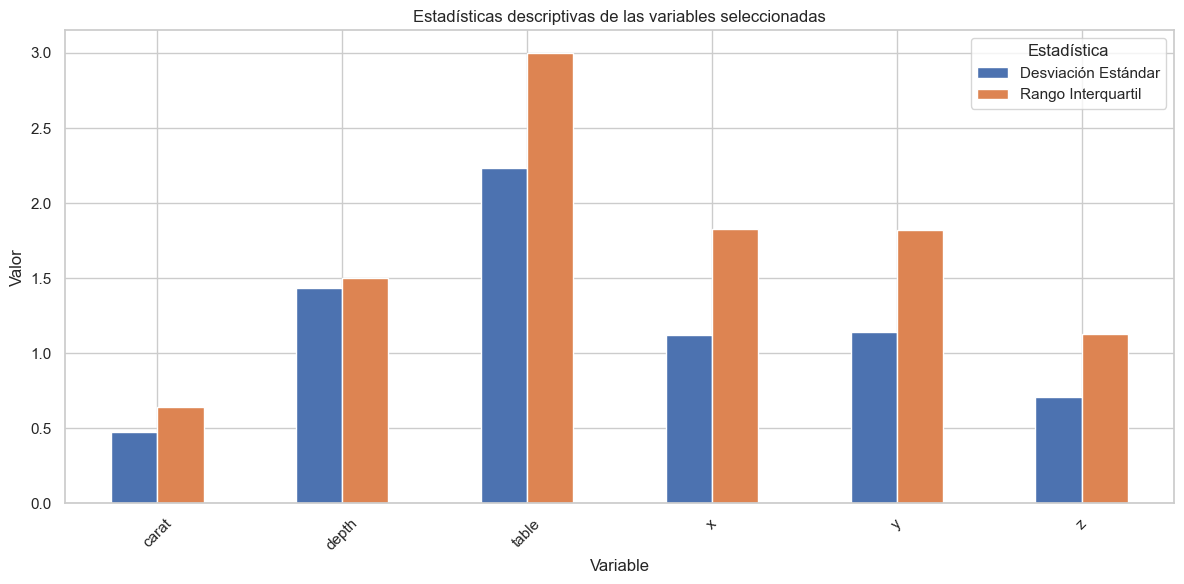

In [223]:
# Seleccionar sólo las columnas numéricas, excluyendo 'price'
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns[numeric_columns != 'price']
filtered_df = df[numeric_columns]

std = filtered_df.std().reset_index()
quartiles = filtered_df.quantile([0.25, 0.75])

iqr = quartiles.loc[0.75] - quartiles.loc[0.25]

std = std.rename(columns={'index':'Variable', 0:'Valor'})
iqr = iqr.reset_index().rename(columns={'index':'Variable', 0:'Valor'})

std['Statistic'] = 'Desviación Estándar'
iqr['Statistic'] = 'Rango Interquartil'

merged_df = pd.concat([std, iqr])

pivoted_df = merged_df.pivot(index='Variable', columns='Statistic', values='Valor').reset_index()

print(tabulate(pivoted_df, headers='keys', tablefmt='pipe', showindex=False))

# Graficar
fig, ax = plt.subplots(figsize=(12, 6))
pivoted_df.plot(kind='bar', ax=ax)
plt.xticks(range(len(pivoted_df)), pivoted_df['Variable'], rotation=45)
plt.ylabel('Valor')
plt.title('Estadísticas descriptivas de las variables seleccionadas')
plt.xlabel('Variable')
plt.legend(title='Estadística')
plt.tight_layout()
plt.show()

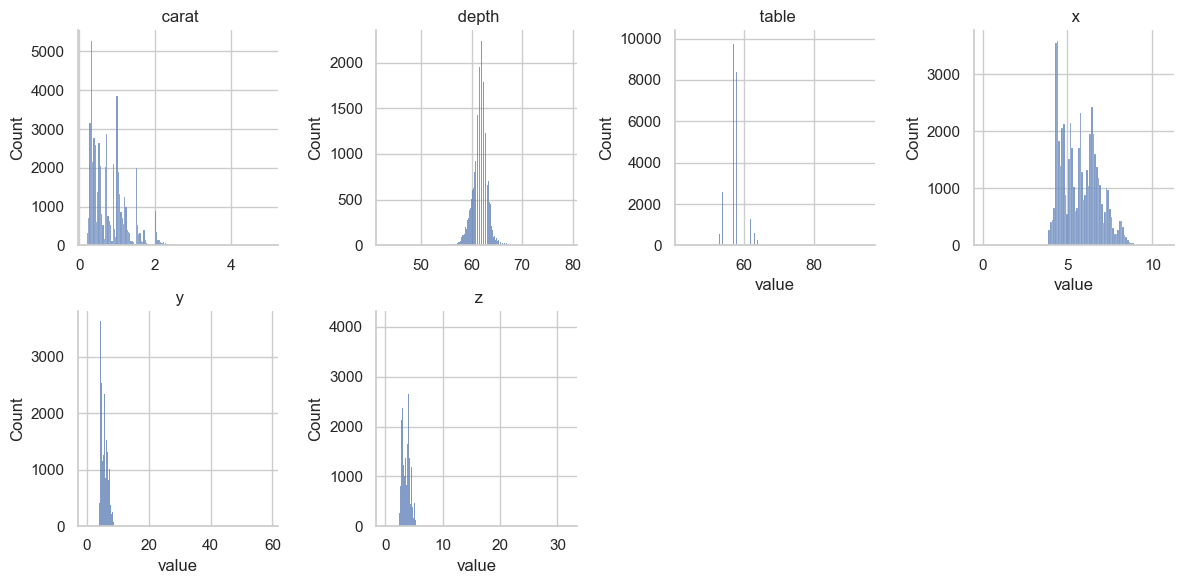

In [201]:
# Filter numerical columns excluding 'price'
num_cols = [col for col in df.columns if df[col].dtype != 'object' and col != 'price']

# Create a FacetGrid with col_wrap=4
grid = sns.FacetGrid(melted_df, col='variable', col_wrap=4, sharex=False, sharey=False)

# Map histplot to each facet of the grid
grid.map(sns.histplot, 'value')

# Add titles to each subplot
for ax in grid.axes.flat:
    ax.set_title(ax.get_title().split('=')[1])

# Show the plot
plt.show()

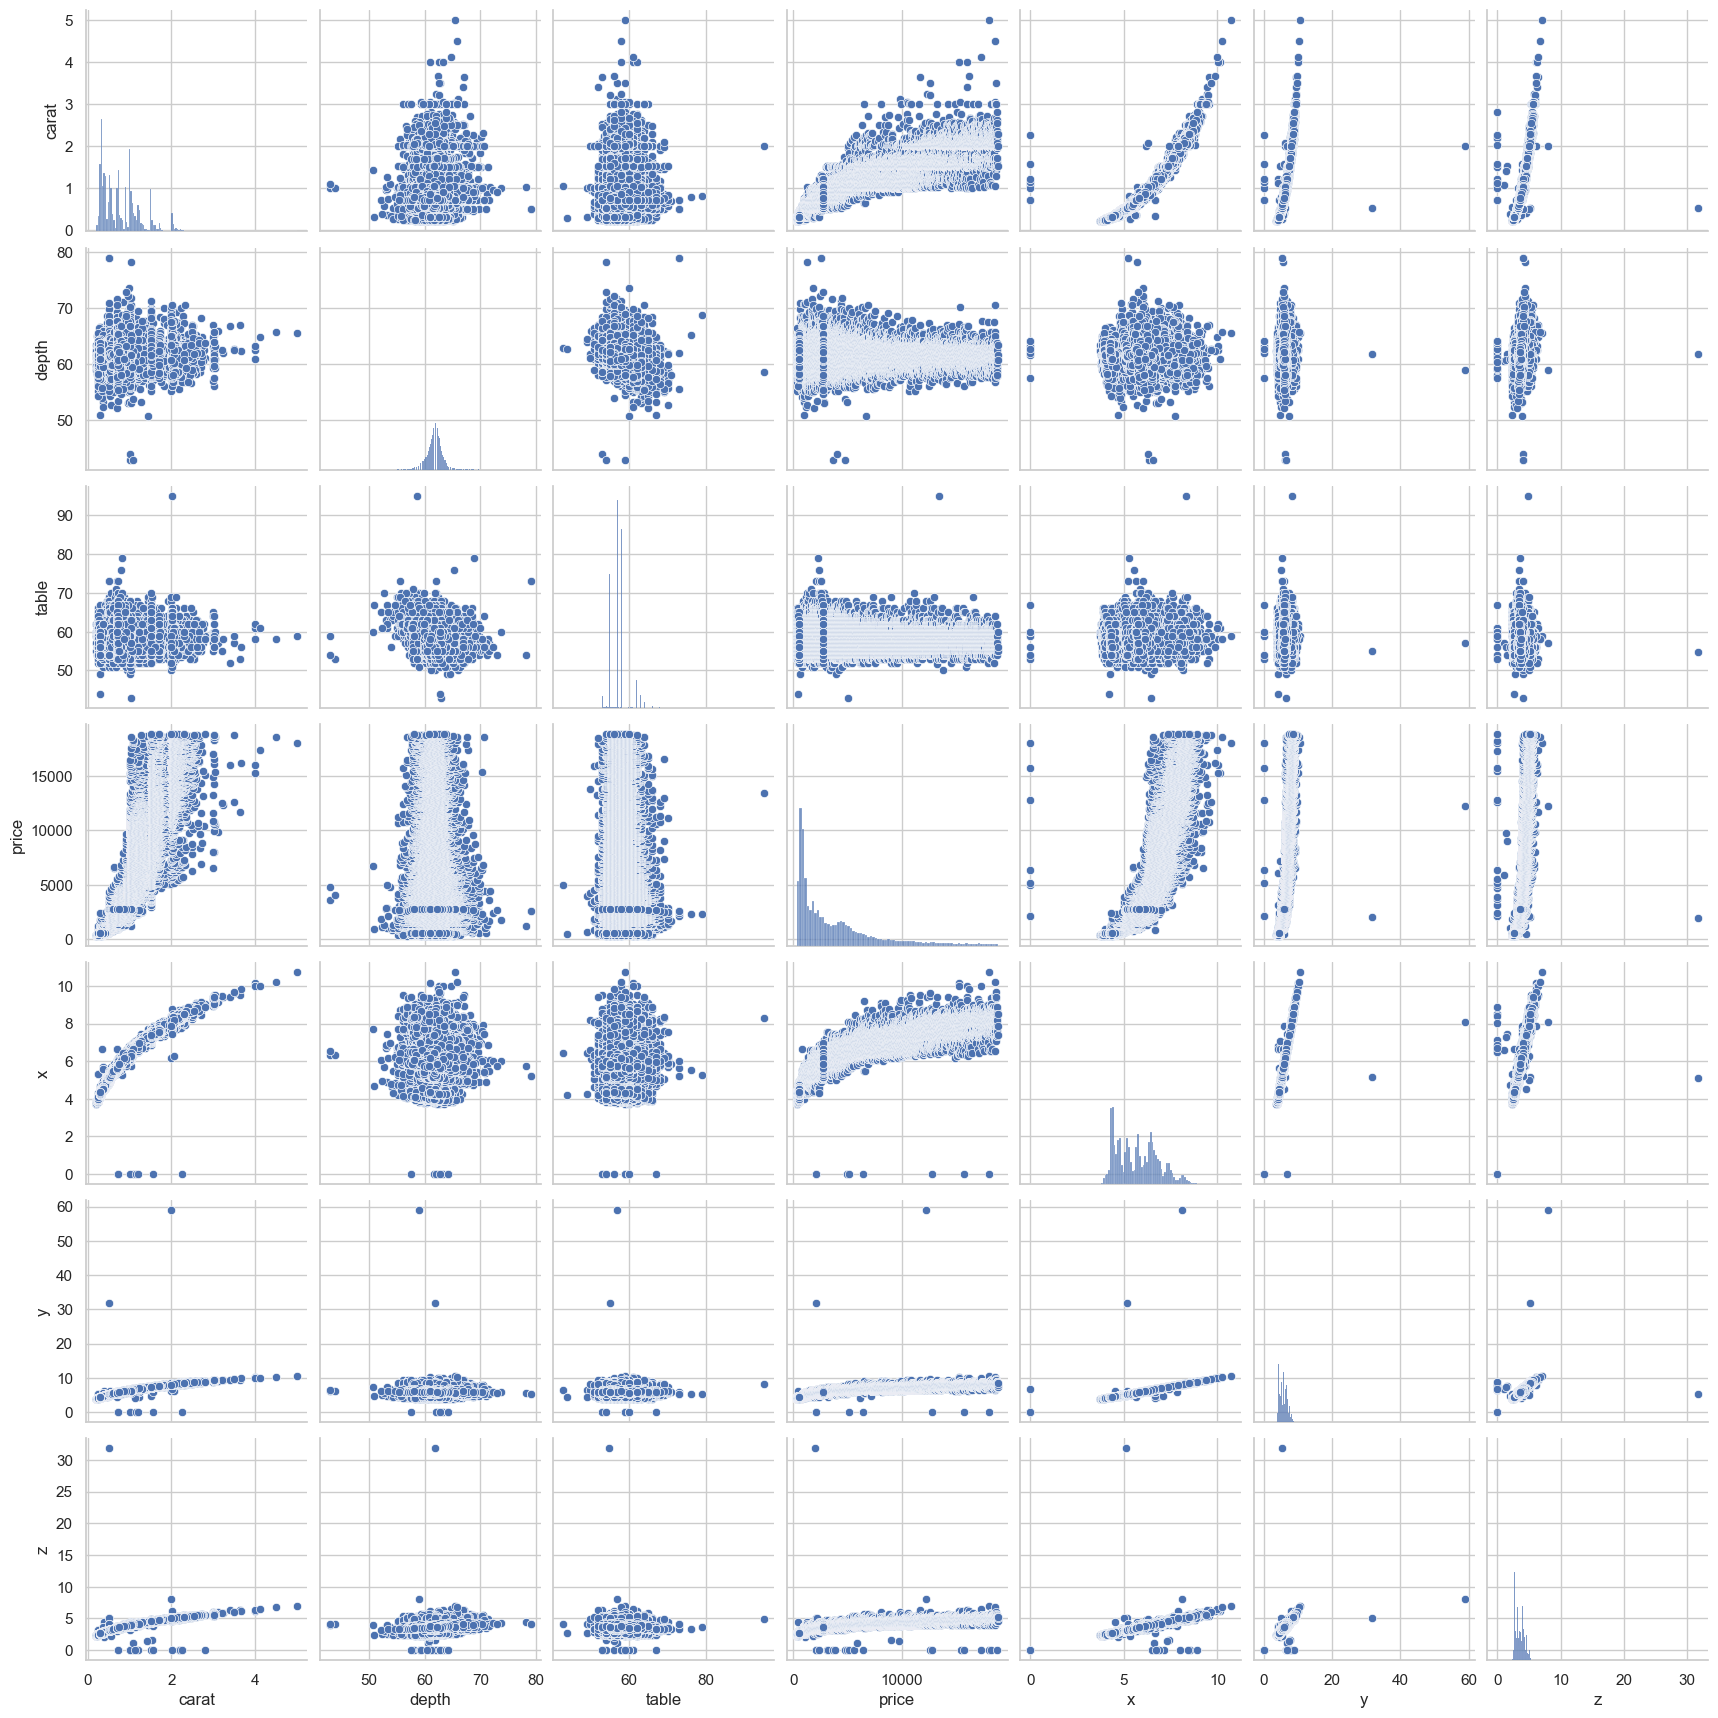

In [200]:
try:
    # Replace with NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Remove NaN Values (optional)
    df.dropna(inplace=True)

    sns.pairplot(df)
except Exception as e:
    print("Error:", e)

# Label Encoding 'cut' - One Hot Encoding 'color', 'clarity', 

In [4]:
# Identificar columnas cauntitativas a codificar
categorical_cols = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']

# Verificar si las columnas existen en el DataFrame
for col in categorical_cols:
    if col not in df.columns:
        raise ValueError(f"La columna '{col}' no existe en el DataFrame.")

# Copiar el DataFrame original
df_transformed = df.copy()

# Label Encoding para 'cut'
le = preprocessing.LabelEncoder()
df_transformed['cut'] = le.fit_transform(df_transformed['cut'])

# One-Hot Encoding para 'color' y 'clarity'
df_transformed = pd.get_dummies(df_transformed, columns=['color', 'clarity'], drop_first=True)

# Seleccionar solo las columnas codificadas
# Excluir las columnas originales no categóricas
original_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
encoded_cols = [col for col in df_transformed.columns if col not in original_cols]
df_transformed_only = df_transformed[encoded_cols].astype(float)

# Mostrar resultados
print("DataFrame transformado")
print("\nNombres de columnas del DataFrame transformado:")
df_transformed_only.head()

DataFrame transformado

Nombres de columnas del DataFrame transformado:


,cut,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [5]:
# Identificar columnas cauntitativas a codificar
categorical_cols = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']

# Verificar si las columnas existen en el DataFrame
for col in categorical_cols:
    if col not in df.columns:
        raise ValueError(f"La columna '{col}' no existe en el DataFrame.")

# Copiar el DataFrame original
df_transformed = df.copy()

# Label Encoding para 'cut'
le = preprocessing.LabelEncoder()
df_transformed['cut'] = le.fit_transform(df_transformed['cut'])

# One-Hot Encoding para 'color' y 'clarity'
df_transformed = pd.get_dummies(df_transformed, columns=['color', 'clarity'], drop_first=True)

# Seleccionar solo las columnas codificadas
encoded_cols = [col for col in df_transformed.columns]
df_transformed_only = df_transformed[encoded_cols].astype(float)

# Mostrar resultados
print("\nNombres de columnas del DataFrame:")
print(df_transformed_only.columns.tolist())

# Mostrar resultados
print("DataFrame transformado:\n")
df_transformed_only.head()




Nombres de columnas del DataFrame:
['carat', 'cut', 'depth', 'table', 'price', 'x', 'y', 'z', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']
DataFrame transformado:



,carat,cut,depth,table,price,x,y,z,color_E,color_F,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,2.0,61.5,55.0,326.0,3.95,3.98,2.43,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,3.0,59.8,61.0,326.0,3.89,3.84,2.31,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,1.0,56.9,65.0,327.0,4.05,4.07,2.31,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,3.0,62.4,58.0,334.0,4.20,4.23,2.63,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,1.0,63.3,58.0,335.0,4.34,4.35,2.75,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Normalización y Estandarización